<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/Nonlinear-Objective-Function-Optimization-using-Genetic-Algorithm/blob/main/Maximize_a_function_by_a_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

traçons la courbe de la fonction  f : x ∈ [−1, 1] f→ −(x^2(2 + sin(10x))^2) ∈ R

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

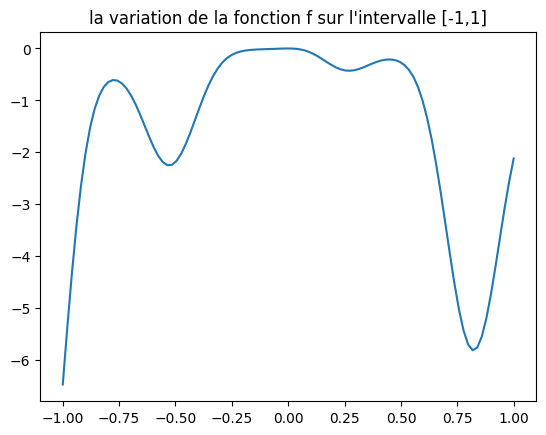

In [2]:
x=np.linspace(-1,1,100)
y= -((x**2)*(2+np.sin(10*x))**2)
plt.title("la variation de la fonction f sur l'intervalle [-1,1]")
plt.plot(x,y)
plt.show()

In [3]:
(Xmax,Xmin)=(np.max(y),np.min(y))
(Xmax,Xmin)

(-0.0003680047654288033, -6.472043412650782)

d'après le graphe de la fonction f on remarque qu'elle a plusieurs extremums locaux par contre il a un maximum et un minimum global Xmax,Xmin

à l'aide d'une algorithme génétique on cherche à maximiser la fonction f sachant  que:
- prec la précision voulue
- N pop la taille de la population
- pM la proportion de grande mutation : individu ← U([−1, 1])
- pm la proportion de petite mutation de taille em autour du meilleur :individu ← individumax +U([−em, em])
- ps la proportion de sexe : individu ← (individumax + individu)/2
- on conserve le meilleur `a chaque tour (pM + pm + ps < 1).

In [4]:
def f(x):
  return -((x**2)*(2+np.sin(10*x))**2)

In [5]:
def creer_population(Npop):
  population=np.random.uniform(-1,1,size=Npop)
  return population

In [6]:
def mutation(individu):
  return individu + np.random.uniform(-1,1)

In [7]:
def mutation_petite(individu_max,em):
  return individu_max + np.random.uniform(-em,em)

In [8]:
def crossover(individu_max,individu):
  return (individu_max+individu)/2

on implémante l'algo génétique en prenant em=O.1

In [35]:
def algo_genetique(Npop, pM, pm, ps, prec,em):
    population = creer_population(Npop)
    meilleur_fitness = float('-inf')
    meilleur_x = None
    temps_debut = time.time()
    while True:
        fit = [f(x) for x in population]
        meilleur_index = np.argmax(fit)
        current_best_fitness = fit[meilleur_index]

        if current_best_fitness > meilleur_fitness:
            meilleur_fitness = current_best_fitness
            meilleur_x = population[meilleur_index]

        erreur = max(fit) - meilleur_fitness

        if erreur < prec:
          temps_fin = time.time()
          break



        Nouvel_individu = []

        for _ in range(int(pM * Npop)):
            Nouvel_individu.append(mutation(meilleur_x))
        for _ in range(int(pm * Npop)):
            Nouvel_individu.append(mutation_petite(meilleur_x, em))
        for _ in range(int(ps * Npop)):
            Nouvel_individu.append(crossover(meilleur_x, np.random.choice(population)))
        population = np.array(Nouvel_individu)[:Npop]
    return meilleur_x, (temps_fin - temps_debut)

In [37]:
Npop = 10
pM = 0.2
pm = 0.3
ps = 0.5
prec = 1e-2
em=0.1

meilleur_x, temps_execution = algo_genetique(Npop, pM, pm, ps, prec,em)
meilleur_y = f(meilleur_x)
print("Meilleur x trouvé:", meilleur_x)
print("Valeur de la fonction à ce point:", meilleur_y)
print("Temps d'exécution:", temps_execution)


Meilleur x trouvé: -0.04293355335903937
Valeur de la fonction à ce point: -0.004623360375362332
Temps d'exécution: 0.0002875328063964844


 A Npop = 10, pM = .8 et pm = ps = 0. Traçons le
logarithme du temps moyen correspondant.

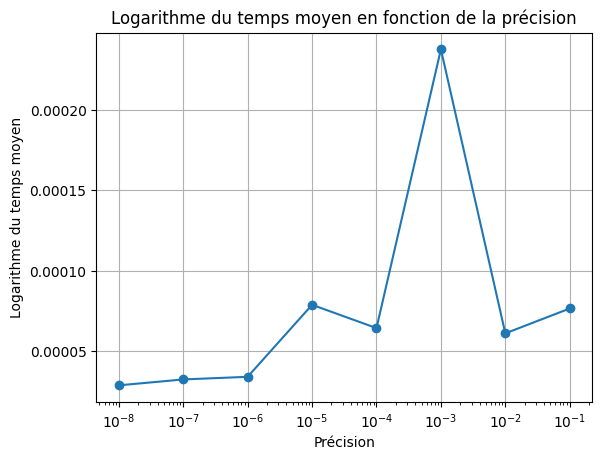

In [55]:
Npop = 10
pM = 0.8
pm = ps = 0
em=0.1
precisions = [10**(-8*i/8) for i in range(1, 9)]

log_temps_moyen = []
for prec in precisions:
    temps_moyens = []
    for _ in range(10):
        _, temps = algo_genetique(Npop, pM, pm, ps, prec,em)
        temps_moyens.append(temps)
    log_temps_moyen.append(np.mean((temps_moyens)))

plt.plot(precisions, log_temps_moyen, marker='o')
plt.xlabel('Précision')
plt.ylabel('Logarithme du temps moyen')
plt.title('Logarithme du temps moyen en fonction de la précision')
plt.xscale('log')
plt.grid(True)
plt.show()


A précision prec = 10−8
, N pop = 10, pM = .8 ajoutons des petites mutations pm > 0 et em ∈]0, .1[. Faisons
quelques tests avec différents (pm, em)

---



In [43]:
Npop = 10
pM = 0.8
prec = 1e-8

pm_values = [0.1, 0.3, 0.5, 0.7]
em_values = [0.01, 0.03, 0.05, 0.07, 0.09]

results = {}

for pm in pm_values:
    for em in em_values:
        meilleur_x, temps_execution = algo_genetique(Npop, pM, pm, pm, prec, em)
        results[(pm, em)] = (meilleur_x, temps_execution)

for (pm, em), (meilleur_x, temps_execution) in results.items():
    print(f"pm={pm}, em={em}: Meilleur x trouvé = {meilleur_x}, Temps d'exécution = {temps_execution}")


pm=0.1, em=0.01: Meilleur x trouvé = -0.012960508316771646, Temps d'exécution = 0.0001621246337890625
pm=0.1, em=0.03: Meilleur x trouvé = -0.0832536193674247, Temps d'exécution = 0.00026416778564453125
pm=0.1, em=0.05: Meilleur x trouvé = 0.4523844145875038, Temps d'exécution = 4.649162292480469e-05
pm=0.1, em=0.07: Meilleur x trouvé = 0.37501721912281405, Temps d'exécution = 4.673004150390625e-05
pm=0.1, em=0.09: Meilleur x trouvé = -0.07063800675686882, Temps d'exécution = 4.363059997558594e-05
pm=0.3, em=0.01: Meilleur x trouvé = 0.06233976370177574, Temps d'exécution = 4.0531158447265625e-05
pm=0.3, em=0.03: Meilleur x trouvé = -0.08685758149588518, Temps d'exécution = 4.029273986816406e-05
pm=0.3, em=0.05: Meilleur x trouvé = -0.012496541905947511, Temps d'exécution = 3.9577484130859375e-05
pm=0.3, em=0.07: Meilleur x trouvé = -0.091411647077003, Temps d'exécution = 4.0531158447265625e-05
pm=0.3, em=0.09: Meilleur x trouvé = -0.034387342668791065, Temps d'exécution = 5.2928924560

In [48]:
Npop = 10
pM = 0.8
prec = 1e-8
pm=0
em_values = [0.01, 0.03, 0.05, 0.07, 0.09]
for em in em_values:
  meilleur_x, temps_execution = algo_genetique(Npop, pM, pm, pm, prec, em)
  print(f"pm={pm}, em={em}: Meilleur x trouvé = {meilleur_x}, Temps d'exécution = {temps_execution}")


pm=0, em=0.01: Meilleur x trouvé = -0.19907742575662346, Temps d'exécution = 0.0001289844512939453
pm=0, em=0.03: Meilleur x trouvé = -0.05822048701353566, Temps d'exécution = 8.797645568847656e-05
pm=0, em=0.05: Meilleur x trouvé = -0.1785128558093918, Temps d'exécution = 7.343292236328125e-05
pm=0, em=0.07: Meilleur x trouvé = -0.17162066536469034, Temps d'exécution = 6.985664367675781e-05
pm=0, em=0.09: Meilleur x trouvé = -0.2253812241622033, Temps d'exécution = 7.891654968261719e-05


B3) A précision prec = 10−8
, pM = pm = ps = (M − 1)/3, em = .01 faisons varier la taille de la population
N pop = (10^1
, 102
, ...10^5
)




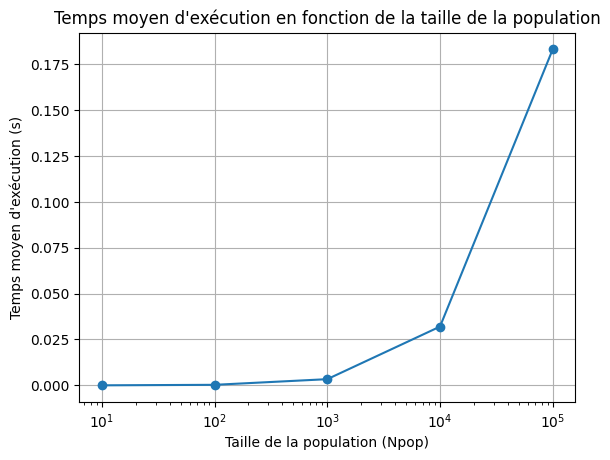

In [49]:
precision = 1e-8
pm = ps = (Npop - 1) / 3
em = 0.01
max_Npop = 10**5

Npop_values = [10**i for i in range(1, 6)]

temps_moyens = []

for Npop in Npop_values:
    temps_executions = []
    for _ in range(10):
        _, temps_execution = algo_genetique(Npop, pM, pm, ps, precision, em)
        temps_executions.append(temps_execution)
    temps_moyens.append(np.mean(temps_executions))

plt.plot(Npop_values, temps_moyens, marker='o')
plt.xlabel('Taille de la population (Npop)')
plt.ylabel('Temps moyen d\'exécution (s)')
plt.title('Temps moyen d\'exécution en fonction de la taille de la population')
plt.xscale('log')
plt.grid(True)
plt.show()
